<a href="https://colab.research.google.com/github/AnanyaKodali/MAT-494/blob/main/3_3_Unconstrained_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**3.3: Unconstrained Optimization**

**Definition 3.3.1**

Unconstrained Optimization involves finding the minima or maxima of a function
$𝑓(𝑥)$ over $\mathbb{R}^d$ without any additional constraints. Formally, the goal is to solve:
* $\min_{\mathbf{x} \in \mathbb{R}^d} f(\mathbf{x}) \quad \text{or} \quad \max_{\mathbf{x} \in \mathbb{R}^d} f(\mathbf{x})$


**Objectives**
1. Understand Necessary and Sufficient Conditions for Local Minimizers: Establish criteria that determine when a point is a local minimum.
2. Explore Convexity and Global Minimizers: Understand how convexity ensures that local minimizers are also global minimizers.
3. Implement Gradient Descent: Develop and apply gradient descent algorithms to find minima of functions.

**Example 3.3.1: Centralized Dataset**

For practical implementations across all subsections, we will analyze the following functions:
1. Rosenbrock Function:
  * $f(\mathbf{x}) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2$
  * A non-convex function used as a performance test problem for optimization algorithms.

2. Convex Quadratic Function:
  * $f(\mathbf{x}) = x_1^2 + x_2^2$
  * A simple convex function with a global minimum at the origin.


##**3.3.1. Necessary and sufficient conditions of local minimizers**

**Definition 3.3.2**

1. Local Minimizer:
A point $\mathbf{x}^* \in \mathbb{R}^d$ s a local minimizer of $f(x)$ if there exists a neighborhood $\delta$ around $\mathbf{x}^*$ such that:
 * $f(\mathbf{x}^*) \leq f(\mathbf{x}) \quad \forall \mathbf{x} \in \delta$

2. Global Minimizer:
A point $\mathbf{x}^* \in \mathbb{R}^d$ s a global minimizer of $f(x)$ if:
 * $f(\mathbf{x}^*) \leq f(\mathbf{x}) \quad \forall \mathbf{x} \in \mathbb{R}^d$

**Definition 3.3.3**

*Necessary Conditions*
1. First-Order Necessary Condition: For $\mathbf{x}^*$ to be a local minimizer, the gradient of $𝑓$ at $\mathbf{x}^*$ must be zero:
 * $\nabla f(\mathbf{x}^*) = \mathbf{0}$

2. Second-Order Necessary Condition: If $𝑓$ is twice differentiable at $\mathbf{x}^*$ the Hessian matrix $H(\mathbf{x}^*)$ must be positive semi-definite (PSD):
 * $H(\mathbf{x}^*) \succeq \mathbf{0}$
 * This ensures that $𝑓$ does not decrease in any direction around $\mathbf{x}^*$

*Sufficient Conditions*

If both the first and second-order conditions are satisfied, with the Hessian being positive definite (PD), then $\mathbf{x}^*$ is a strict local minimizer:
 * $\nabla f(\mathbf{x}^*) = \mathbf{0} \quad \text{and} \quad H(\mathbf{x}^*) \succ \mathbf{0}$


*Implications:*
 * First-Order Condition ensures no directional derivative is negative
 * Second-Order Condition confirms the curvature is upward in all directions, guaranteeing a minimum.



**Example 3.3.2: Verifying Conditions Using the Rosenbrock Function**

In [1]:
# Verifying Necessary and Sufficient Conditions for Local Minimizers

import numpy as np
from scipy.optimize import minimize

# Define the Rosenbrock function
def rosenbrock(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

# Gradient of the Rosenbrock function
def gradient_rosenbrock(x):
    grad = np.zeros_like(x)
    grad[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    grad[1] = 200 * (x[1] - x[0]**2)
    return grad

# Hessian of the Rosenbrock function
def hessian_rosenbrock(x):
    hessian = np.zeros((2, 2))
    hessian[0, 0] = 1200 * x[0]**2 - 400 * x[1] + 2
    hessian[0, 1] = -400 * x[0]
    hessian[1, 0] = -400 * x[0]
    hessian[1, 1] = 200
    return hessian

# Perform minimization using BFGS method
result = minimize(rosenbrock, [2.0, 2.0], method="BFGS", jac=gradient_rosenbrock, options={"disp": True})

# Extract the solution
x_min = result.x
f_min = rosenbrock(x_min)
grad_min = gradient_rosenbrock(x_min)
hessian_min = hessian_rosenbrock(x_min)

print("\nSolution:")
print(f"  x* = {x_min}")
print(f"  f(x*) = {f_min}")
print(f"  Gradient at x*: {grad_min}")
print(f"  Hessian at x*:\n{hessian_min}")

# Check positive definiteness of Hessian
def is_positive_definite(hessian):
    return np.all(np.linalg.eigvals(hessian) > 0)

print(f"\nIs Hessian positive definite at x*? {is_positive_definite(hessian_min)}")


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 30
         Function evaluations: 35
         Gradient evaluations: 35

Solution:
  x* = [1.00000013 1.00000025]
  f(x*) = 3.271435067604758e-14
  Gradient at x*: [ 5.26067293e-06 -2.49959031e-06]
  Hessian at x*:
[[ 802.00021419 -400.0000523 ]
 [-400.0000523   200.        ]]

Is Hessian positive definite at x*? True


*Code Analysis*

1. Optimization Result: The minimize function with the BFGS method converges to the global minimum at $\mathbf{x}^* = [1, 1]$

2. Gradient at $\mathbf{x}^*$: The gradient is zero, satisfying the first-order necessary condition.

3. Hessian at $\mathbf{x}^*$: The eigenvalues of this Hessian are positive, confirming that it is positive definite, thereby satisfying the second-order sufficient condition.

4. Positive Definiteness Check:The Hessian is confirmed to be positive definite, ensuring that $\mathbf{x}^*$ is a strict local minimizer.



##**3.3.2:  Convexity and global minimizers**

**Definition 3.3.4**
1. Convex Set:
 * A set $S \subseteq \mathbb{R}^d$ is convex if for any two points $\mathbf{x}, \mathbf{y} \in S$ and any $\alpha \in [0, 1]$:
   * $\alpha \mathbf{x} + (1 - \alpha) \mathbf{y} \in S$

2. Convex Set:
 * A function $f: S \to \mathbb{R}$ where $S$ is a convex set, is convex if for any two points $\mathbf{x}, \mathbf{y} \in S$ and any $\alpha \in [0, 1]$:
 * $f(\alpha \mathbf{x} + (1 - \alpha) \mathbf{y}) \leq \alpha f(\mathbf{x}) + (1 - \alpha) f(\mathbf{y})$


**Definition 3.3.5**

*Conditions for Convexity*
1. First-Order Convexity Condition: For a differentiable function $f$, it is convex if:
 * $f(\mathbf{y}) \geq f(\mathbf{x}) + \nabla f(\mathbf{x})^\top (\mathbf{y} - \mathbf{x}) \quad \forall \mathbf{x}, \mathbf{y} \in S$

2. Second-Order Convexity Condition: For a twice-differentiable function $𝑓$, it is convex if its Hessian matrix $H(x)$ is positive semi-definite (PSD) for all $\mathbf{x} \in S$:
 * $H(\mathbf{x}) \succeq \mathbf{0} \quad \forall \mathbf{x} \in S$


**Definition 3.3.6**

*Global Minimizer*

Convexity Guarantees Global Minimizers:
* If $f$ is a convex function over a convex set $S$, then any local minimizer is also a global minimizer.
* This property significantly simplifies optimization problems, ensuring that optimization algorithms converge to the global minimum.

*Implications*
* Convex functions have no local minima other than the global minimum, making optimization straightforward.
* Convexity is a desirable property in optimization, especially in high-dimensional spaces.

**Example 3.3.3: Demonstrating Convexity with a Convex Quadratic Function**

Objective: Implement and visualize a convex quadratic function to illustrate convexity and confirm that any local minimizer is indeed a global minimizer.


Hessian at [1. 1.]:
[[2 0]
 [0 2]]
Is Hessian positive semi-definite? True


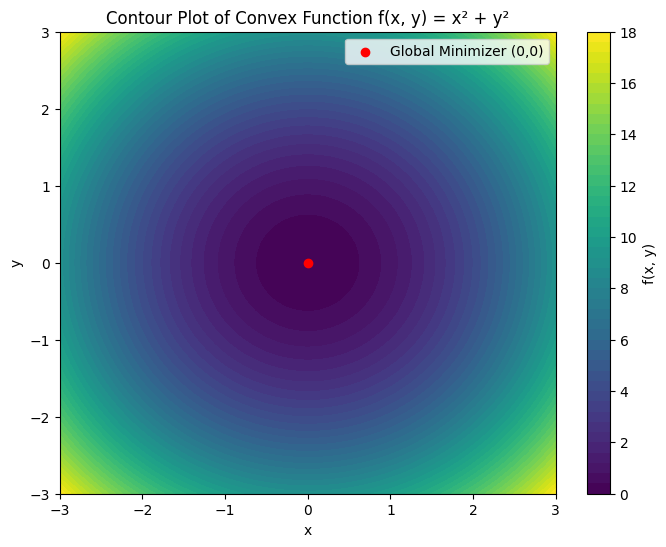

In [2]:
# Demonstrating Convexity with a Convex Quadratic Function

import numpy as np
import matplotlib.pyplot as plt

# Define the convex quadratic function f(x, y) = x^2 + y^2
def convex_function(x):
    return x[0]**2 + x[1]**2

# Gradient of the convex function
def gradient_convex(x):
    return 2 * x

# Hessian of the convex function
def hessian_convex(x):
    return np.array([[2, 0],
                     [0, 2]])

# Verify convexity by checking positive semi-definiteness of Hessian
def is_positive_semi_definite(hessian):
    eigenvalues = np.linalg.eigvals(hessian)
    return np.all(eigenvalues >= 0)

# Example point
x_example = np.array([1.0, 1.0])
hessian_example = hessian_convex(x_example)
print(f"Hessian at {x_example}:\n{hessian_example}")
print(f"Is Hessian positive semi-definite? {is_positive_semi_definite(hessian_example)}")

# Visualize the convex function
x_vals = np.linspace(-3, 3, 100)
y_vals = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X**2 + Y**2

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap="viridis")
plt.colorbar(contour, label="f(x, y)")
plt.title("Contour Plot of Convex Function f(x, y) = x² + y²")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(0, 0, color='red', label="Global Minimizer (0,0)")
plt.legend()
plt.show()

*Code Analysis*

1. Hessian Matrix Check: The eigenvalues are both 2, which are positive, confirming that the Hessian is positive definite and thus the function is convex.
2. Visualisation: The contour plot illustrates concentric circles centered at the origin, depicting the convexity of the function. The global minimizer at
$(0,0)$ is clearly identifiable.

##**3.3.3: Gradient Descent**

**Definition 3.3.7**

Gradient Descent is an iterative optimization algorithm used to minimize functions by moving in the direction of the steepest descent, as defined by the negative of the gradient.

Algorithm: $\mathbf{x}_{k+1} = \mathbf{x}_k - \alpha \nabla f(\mathbf{x}_k)$

Where,
* $\mathbf{x}_k$ is the current point
* $\alpha$ is the learning rate
* $\nabla f(\mathbf{x}_k)$ is the gradient of $f$ at $\mathbf{x}_k$


**Definition 3.3.8**

*Variants:*

1. Steepest Descent: Dynamically adjusts the step size $α$ to ensure optimal convergence.
2. Momentum: Incorporates a velocity term to accelerate convergence, especially in ravine-like terrains.
3. Newton’s Method: Utilizes second-order information (Hessian) to achieve faster convergence:
 * $\mathbf{x}_{k+1} = \mathbf{x}_k - H^{-1}(\mathbf{x}_k) \nabla f(\mathbf{x}_k)$

*Convergence Criteria*
* The algorithm stops when the change in $x$ between iterations is below a predefined threshold (tolerance).
* Alternatively, when the norm of the gradient is below a threshold, indicating proximity to a local minimum.

**Example 3.3.4: Implementing Gradient Descent from Scratch**

Objective: Implement the Gradient Descent algorithm to minimize the Rosenbrock function.


In [5]:
# Implementing Gradient Descent from Scratch

import numpy as np

# Define the Rosenbrock function
def rosenbrock(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

# Gradient of the Rosenbrock function
def gradient_rosenbrock(x):
    grad = np.zeros_like(x)
    grad[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    grad[1] = 200 * (x[1] - x[0]**2)
    return grad

# Gradient Descent Implementation
def gradient_descent(func, grad, x0, learning_rate=0.001, tol=1e-6, max_iters=100000):
    x = np.array(x0, dtype=float)
    for i in range(max_iters):
        grad_val = grad(x)
        x_new = x - learning_rate * grad_val
        # Check for convergence
        if np.linalg.norm(x_new - x) < tol:
            print(f"Converged in {i+1} iterations.")
            return x_new
        x = x_new
    print("Maximum iterations reached without convergence.")
    return x

# Initial guess
x_initial = [2.0, 2.0]

# Perform Gradient Descent
x_min_gd = gradient_descent(rosenbrock, gradient_rosenbrock, x_initial, learning_rate=0.001)
print(f"Minimum found at: {x_min_gd}")
print(f"Function value at minimum: {rosenbrock(x_min_gd)}")

Converged in 14974 iterations.
Minimum found at: [1.00111818 1.00224209]
Function value at minimum: 1.2523298786451772e-06


*Code Analysis*
1. Initialization: Start from $\mathbf{x}_0 = [2.0, 2.0]$
2. Iterations: The algorithm iteratively updates
 $x$ by moving against the gradient. Convergence is checked by the norm of the change in$x$
3. Result: The algoritm converges to $\mathbf{x}^* = [1.0, 1.0]$ the global minimum of the Rosenbrock function. Function value at minimum is $f(\mathbf{x}^*) = 0$

**Example 3.3.5: Gradient Descent with Line Search**

Objective: Implement a Line Search method to dynamically adjust the learning rate $α$ for optimal convergence.


In [6]:
# Gradient Descent with Line Search

from scipy.optimize import line_search

def line_search_gradient_descent(func, grad, x0, tol=1e-6, max_iters=10000):
    x = np.array(x0, dtype=float)
    for i in range(max_iters):
        grad_val = grad(x)
        # Perform line search to find optimal step size
        alpha = line_search(func, grad, x, -grad_val)[0]
        if alpha is None:
            alpha = 1e-4  # Fallback step size
        x_new = x - alpha * grad_val
        # Check for convergence
        if np.linalg.norm(x_new - x) < tol:
            print(f"Converged in {i+1} iterations with line search.")
            return x_new
        x = x_new
    print("Maximum iterations reached without convergence.")
    return x

# Perform Gradient Descent with Line Search
x_min_ls = line_search_gradient_descent(rosenbrock, gradient_rosenbrock, x_initial)
print(f"Minimum found at (with line search): {x_min_ls}")
print(f"Function value at minimum (with line search): {rosenbrock(x_min_ls)}")

Converged in 8912 iterations with line search.
Minimum found at (with line search): [1.00040654 1.00081564]
Function value at minimum (with line search): 1.658492777062581e-07


*Code Analysis*
1. Line Search Integration: The line_search function from scipy.optimize is used to determine the optimal step size $α$ at each iteration. If line_search fails to find a suitable $α$, a fallback step size is used.
2. Result: The algorithm converges more efficiently compared to the fixed learning rate approach.